In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yaml

# FIXED PERCENTAGE

In [100]:
def fixed_percentage(
        datasets=['kuhar', 'motionsense', 'uci', 'wisdm', 'realworld_thigh', 'realworld_waist'],
        models=['ae', 'tae', 'convae', 'convtae', 'umap'],
        markers = ['d', 's', 'p', 'h', 'o'],
        percentages=[25, 50, 75, 100, 200],
        colors = ['blue', 'orange', 'lightgreen', 'darkgreen', 'purple'],
        y_lim = [0, 1]
        ):
    """
    Plots the best accuracy for each model and dataset for a fixed percentage of the dataset.
    """
    for dataset in datasets:
        with open(f'../execute_once_experiments/_previous/TV_sb_no_reducer/scores/no_reducer_{dataset}.yaml') as f:
            no_reducer_score = yaml.load(f, Loader=yaml.FullLoader)
            no_reducer_score = no_reducer_score['score']
        
        for i, percentage in enumerate(percentages):
            # Subplots for each dataset
            fig, axs = plt.subplots(1, 2, figsize=(15, 8))
            plt.suptitle(f'Up to {percentage}% on {dataset}')
            max_length = 0
            for j, model in enumerate(models):
                experiment_name = f'P10_{model}_{dataset}_p{percentage}'
                if model == 'umap':
                    experiment_name = experiment_name[4:]
                try:
                    data = pd.read_csv(f'../experiments/{experiment_name}/data.csv')
                    data = data.loc[data['score'] > 0]
                except:
                    data = pd.DataFrame({'Unnamed: 0': [], 'score': []})
                max_index = data['Unnamed: 0'].max()
                if  max_index > max_length:
                    max_length = max_index
                axs[0].plot(data['Unnamed: 0'], data['score'], markers[j], color=colors[j], markersize=4, label=model)
                axs[1].plot(data['score'].cummax(), color=colors[j], linewidth=2, label=model)
            axs[0].plot([0, max_length], [no_reducer_score, no_reducer_score], color='red', linewidth=2, label='No reducer')
            axs[0].legend(loc='lower center')
            axs[0].set_ylabel(f'Best accuracy')
            axs[0].set_xlabel('Iterations')
            axs[0].grid()
            axs[0].set_ylim(y_lim)
            axs[0].set_facecolor('#e6f5c9')
            axs[1].plot([0, max_length], [no_reducer_score, no_reducer_score], color='red', linewidth=2, label='No reducer')
            axs[1].legend(loc='lower center')
            axs[1].set_ylabel(f'Best accuracy')
            axs[1].set_xlabel('Iterations')
            axs[1].grid()
            axs[1].set_ylim(y_lim)
            axs[1].set_facecolor('#e6f5c9')

            plt.show()

## DATASET KUHAR

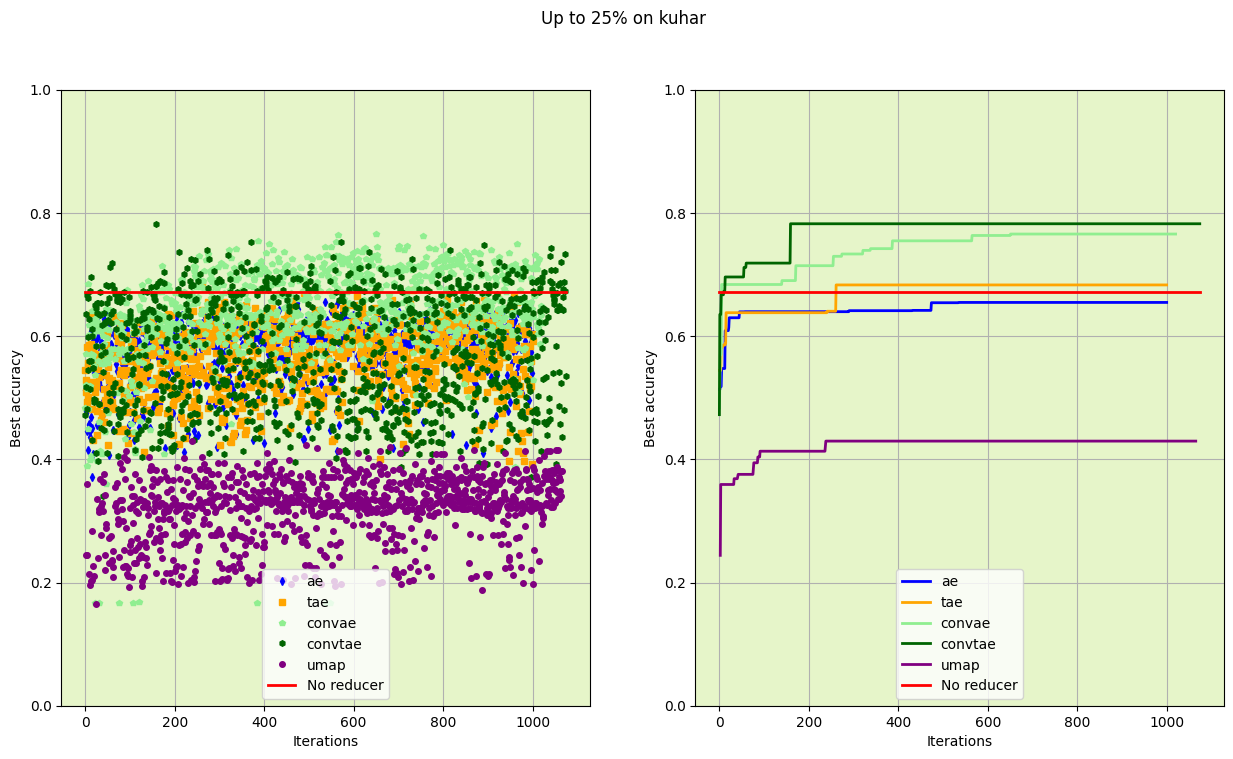

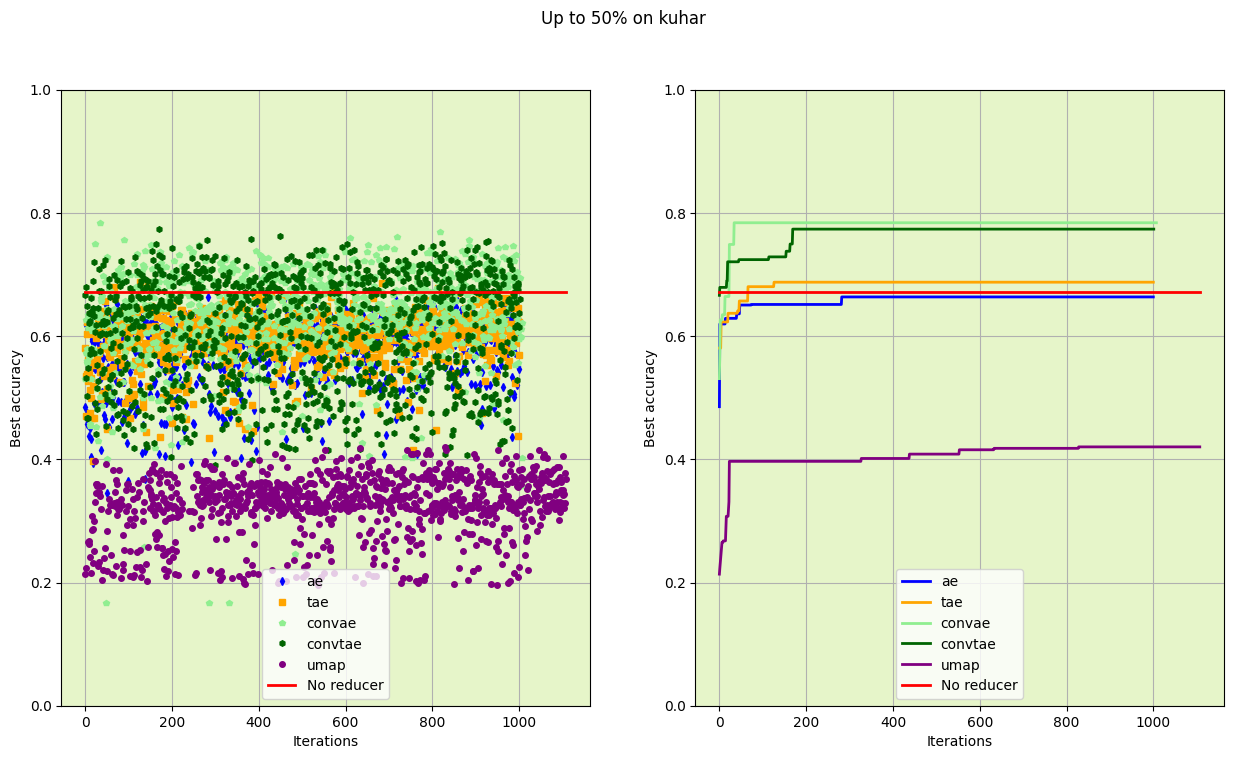

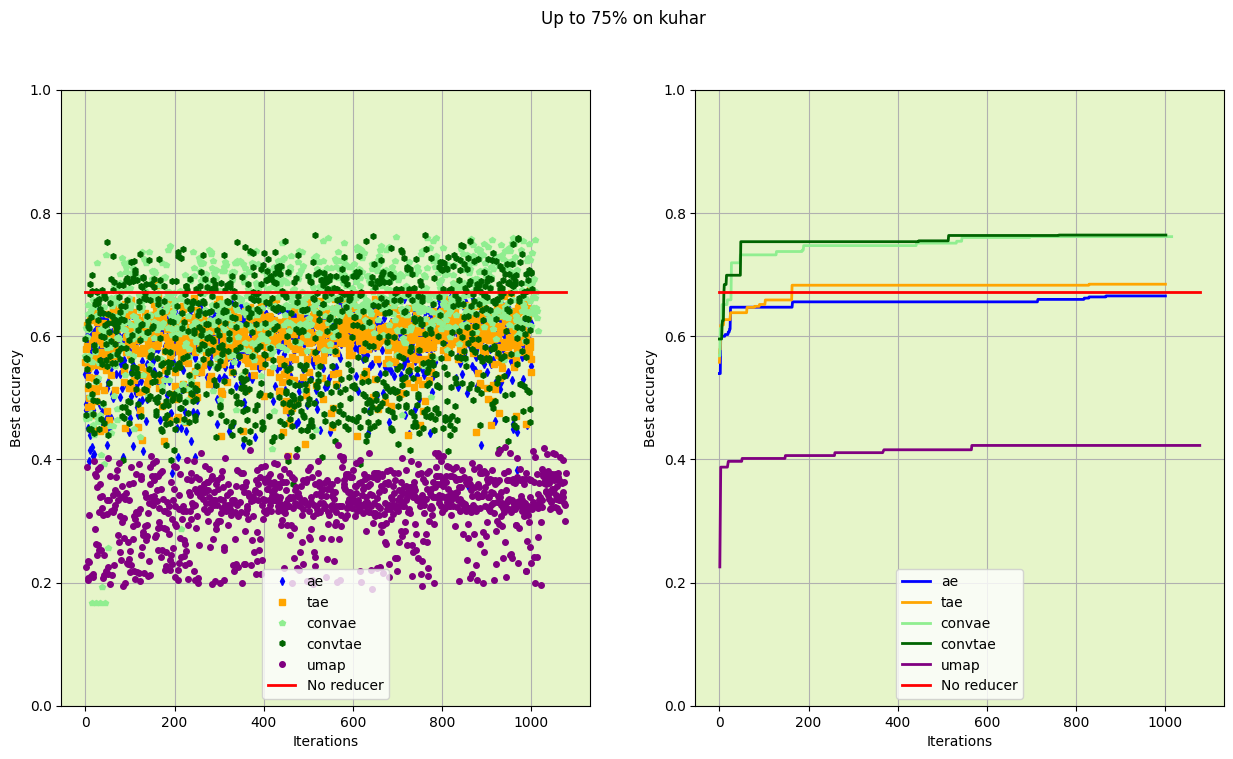

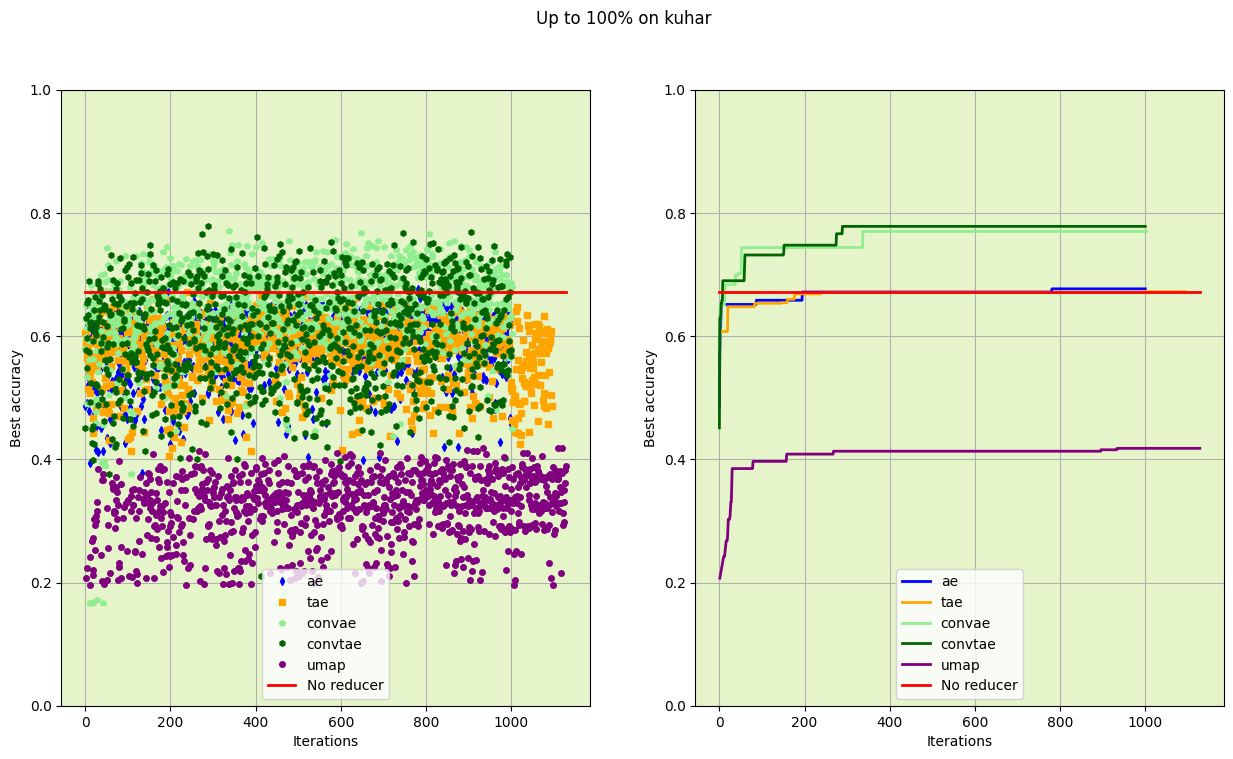

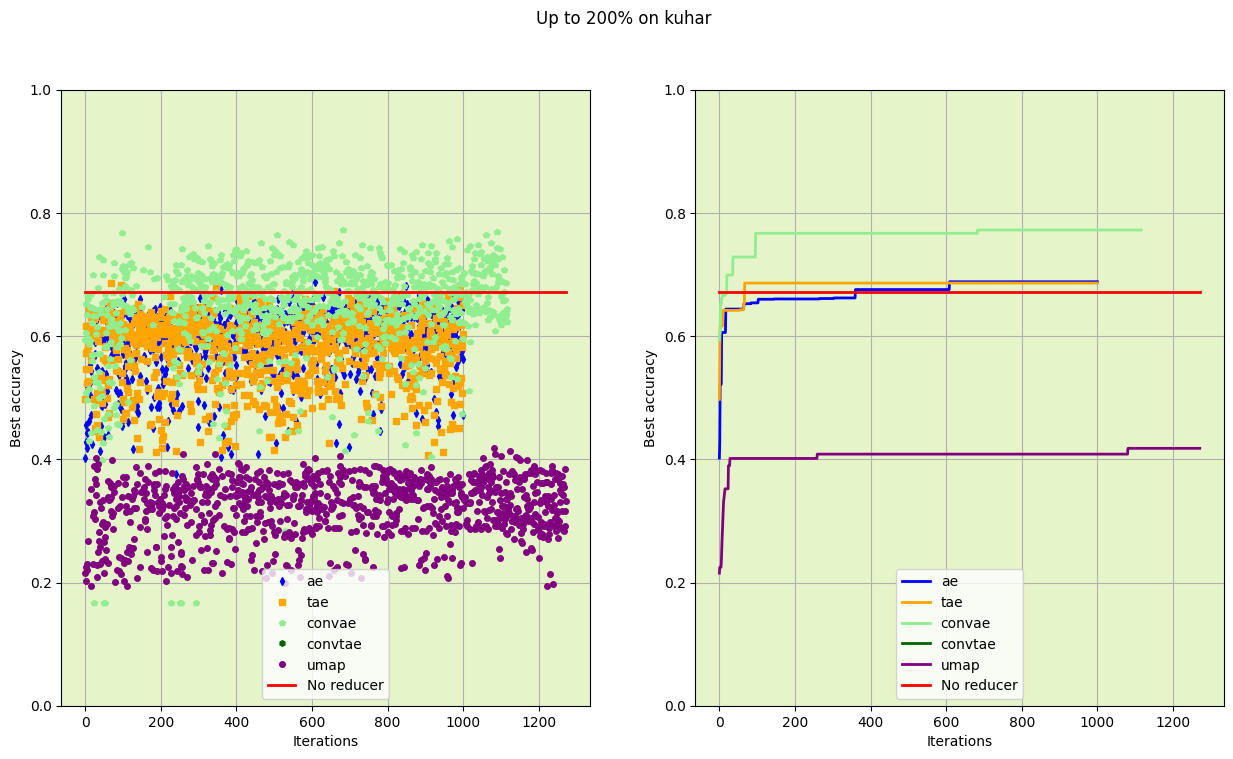

In [101]:
fixed_percentage(datasets=['kuhar'])

## DATASET MOTIONSENSE

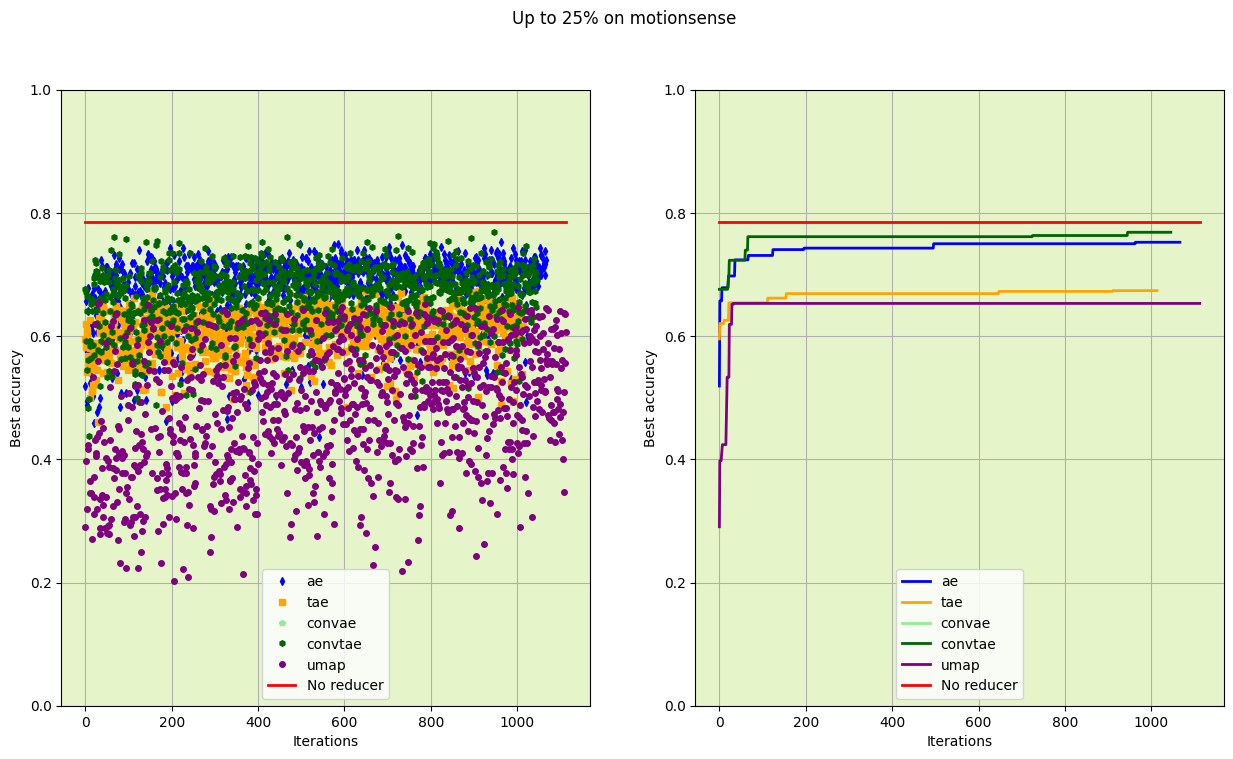

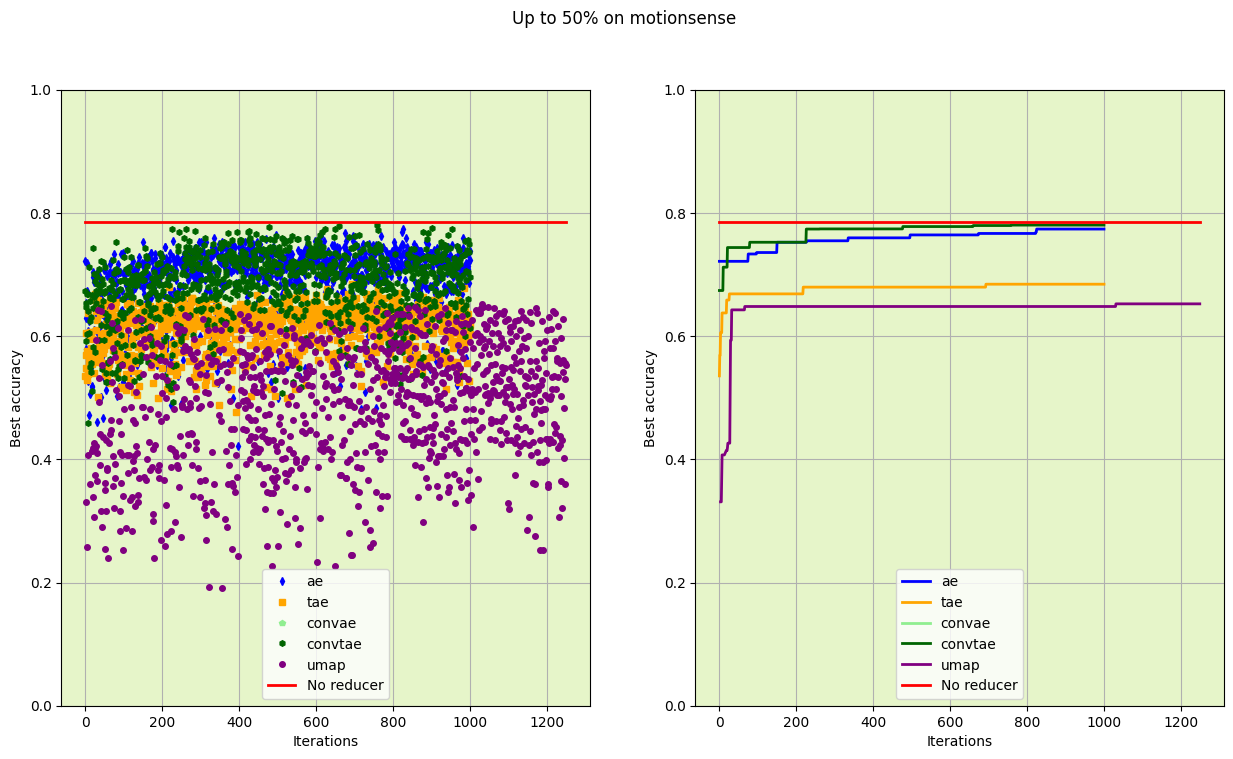

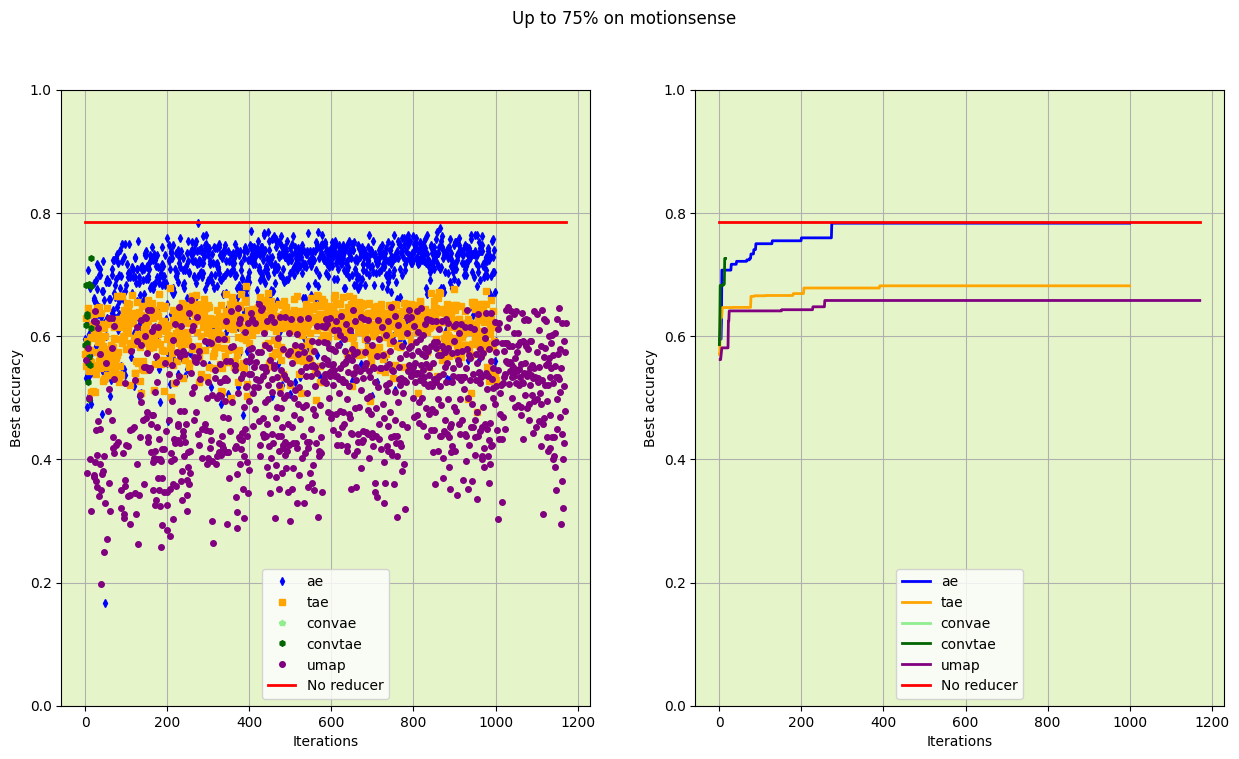

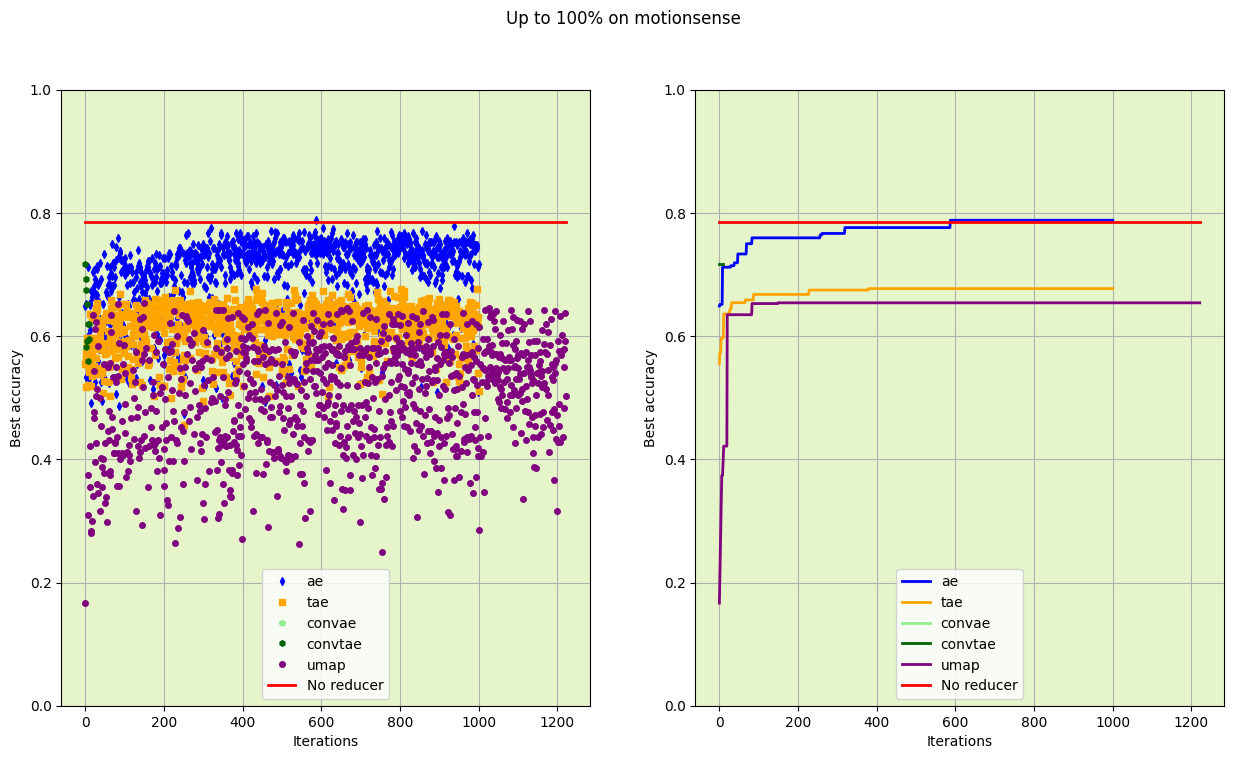

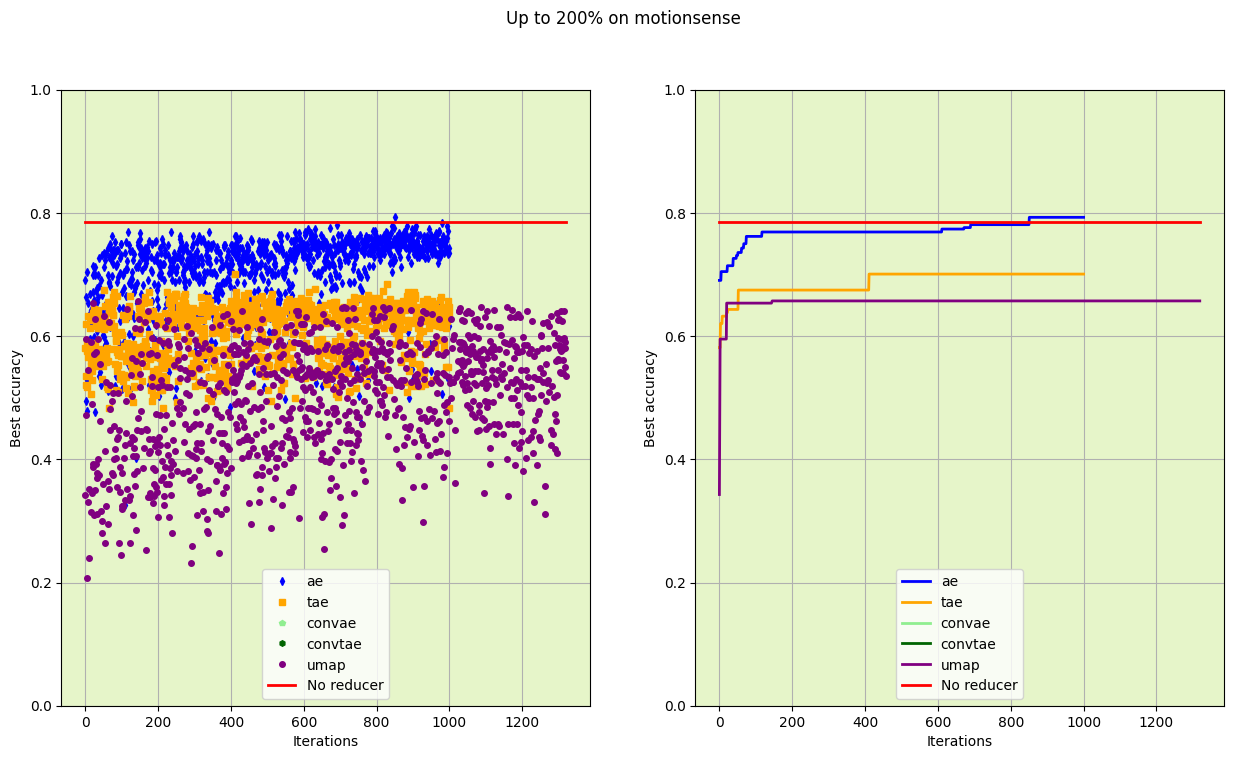

In [102]:
fixed_percentage(datasets=['motionsense'])

## DATASET UCI

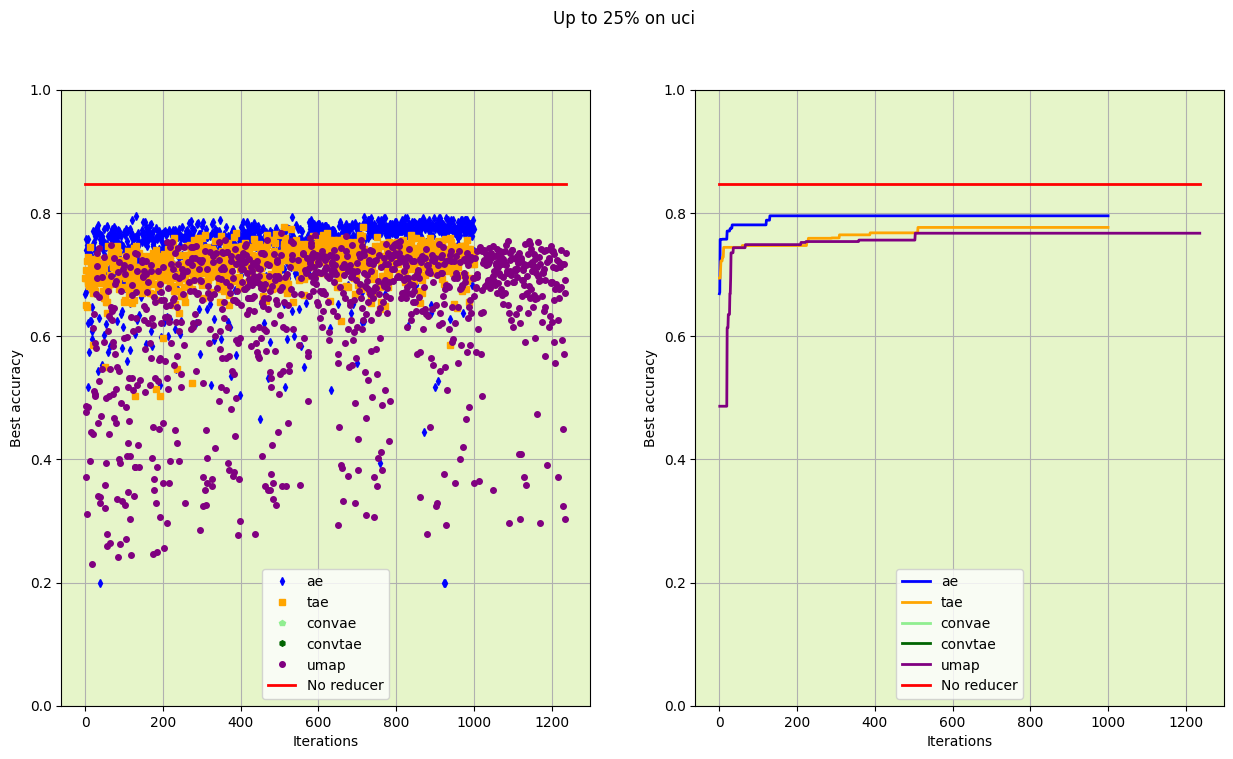

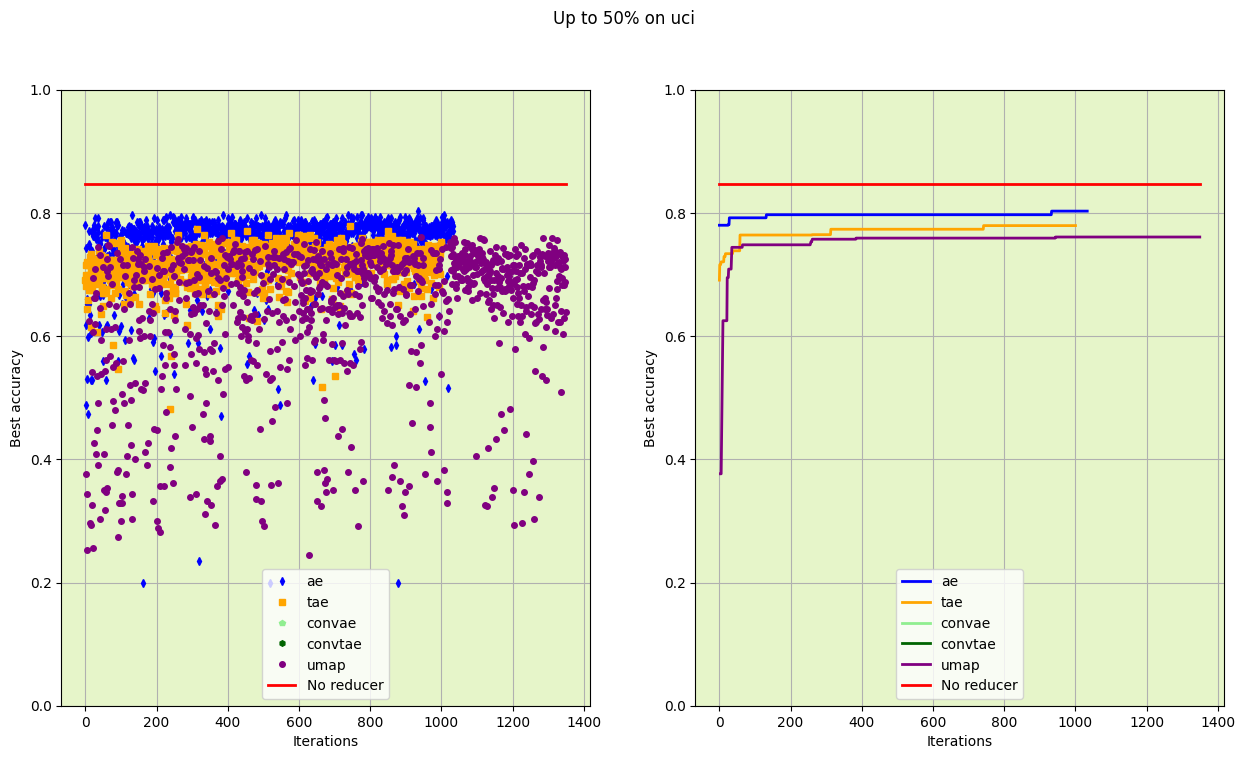

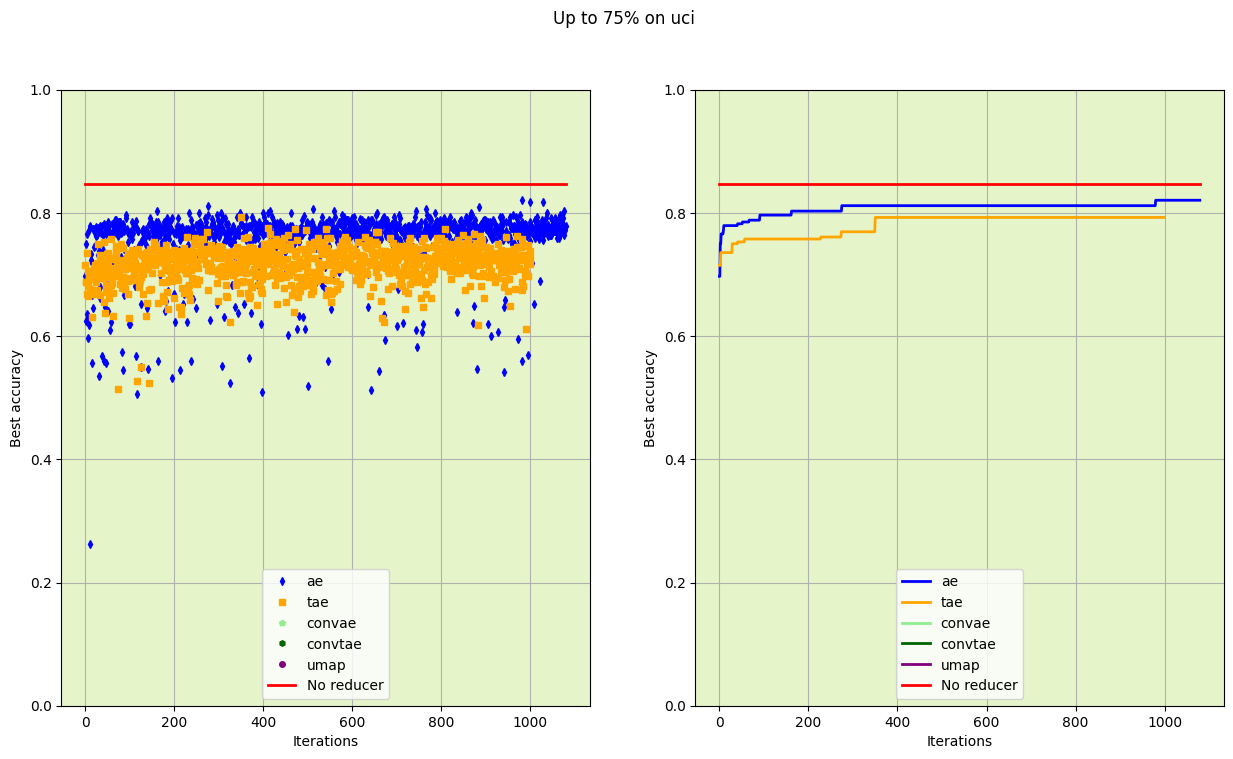

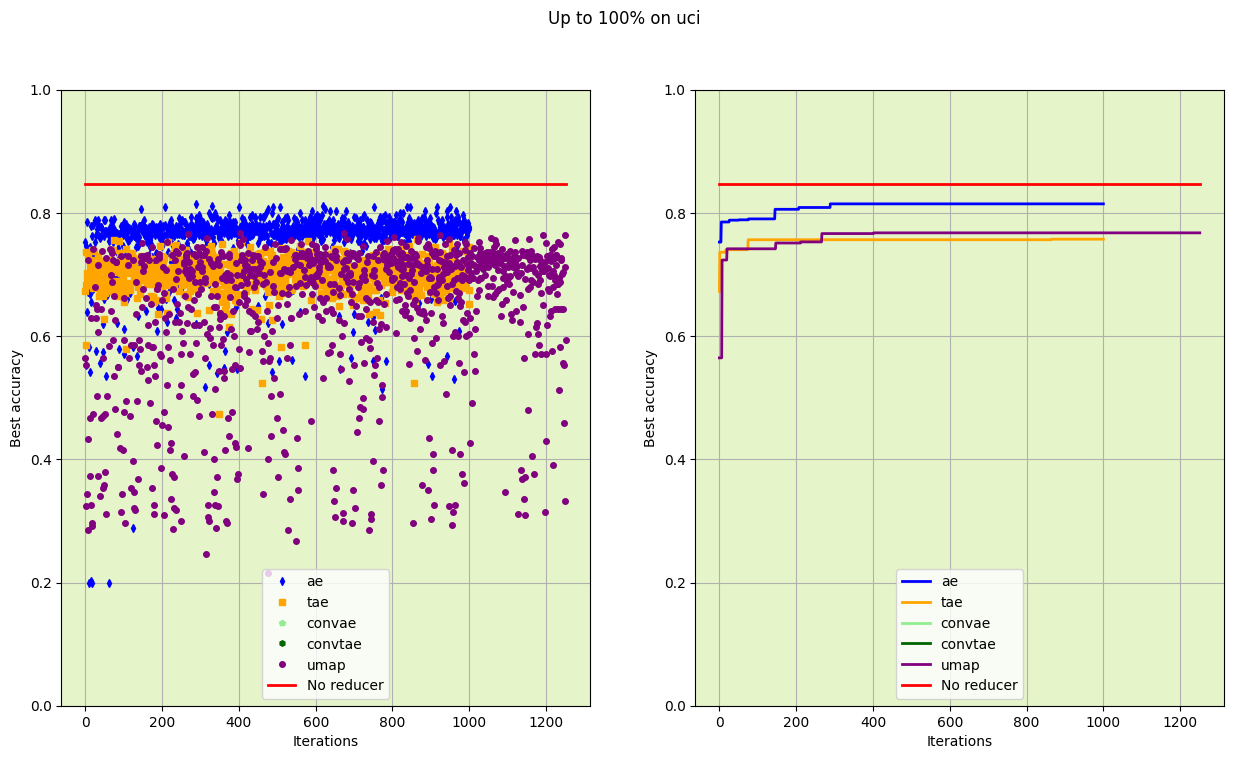

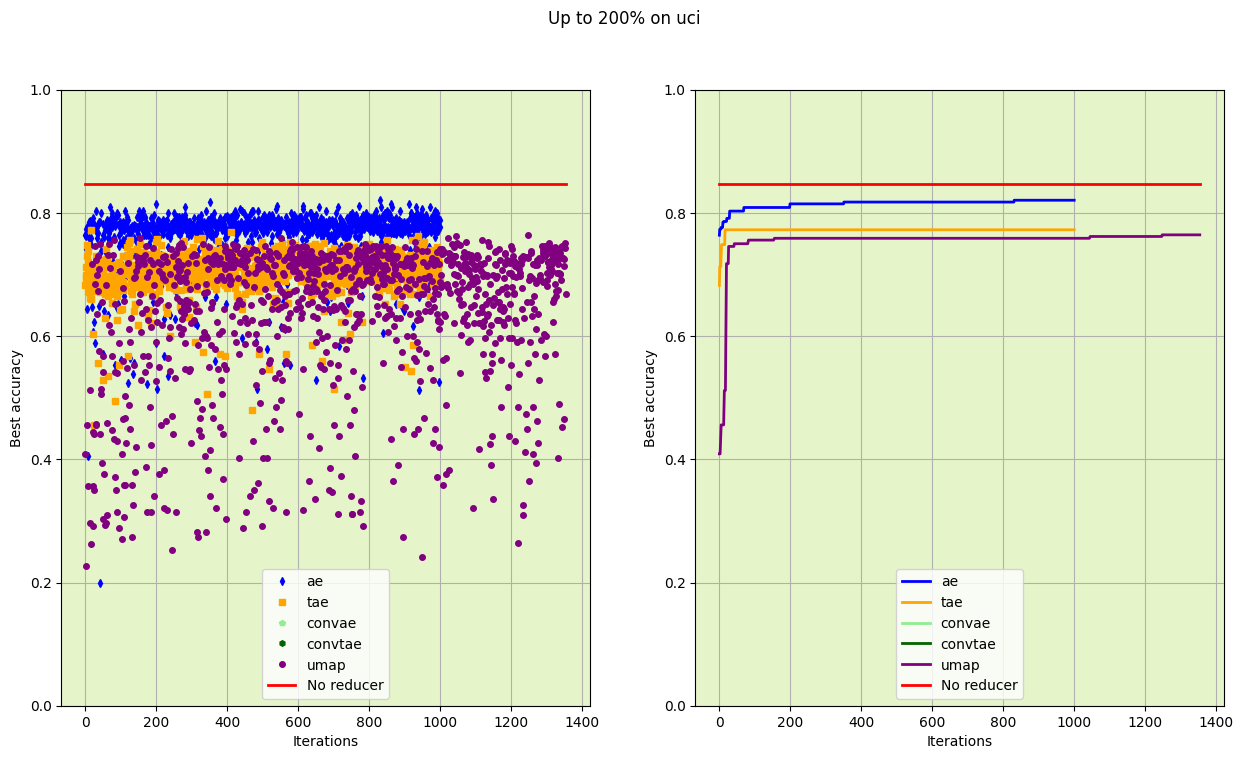

In [103]:
fixed_percentage(datasets=['uci'])

## DATASET WISDM

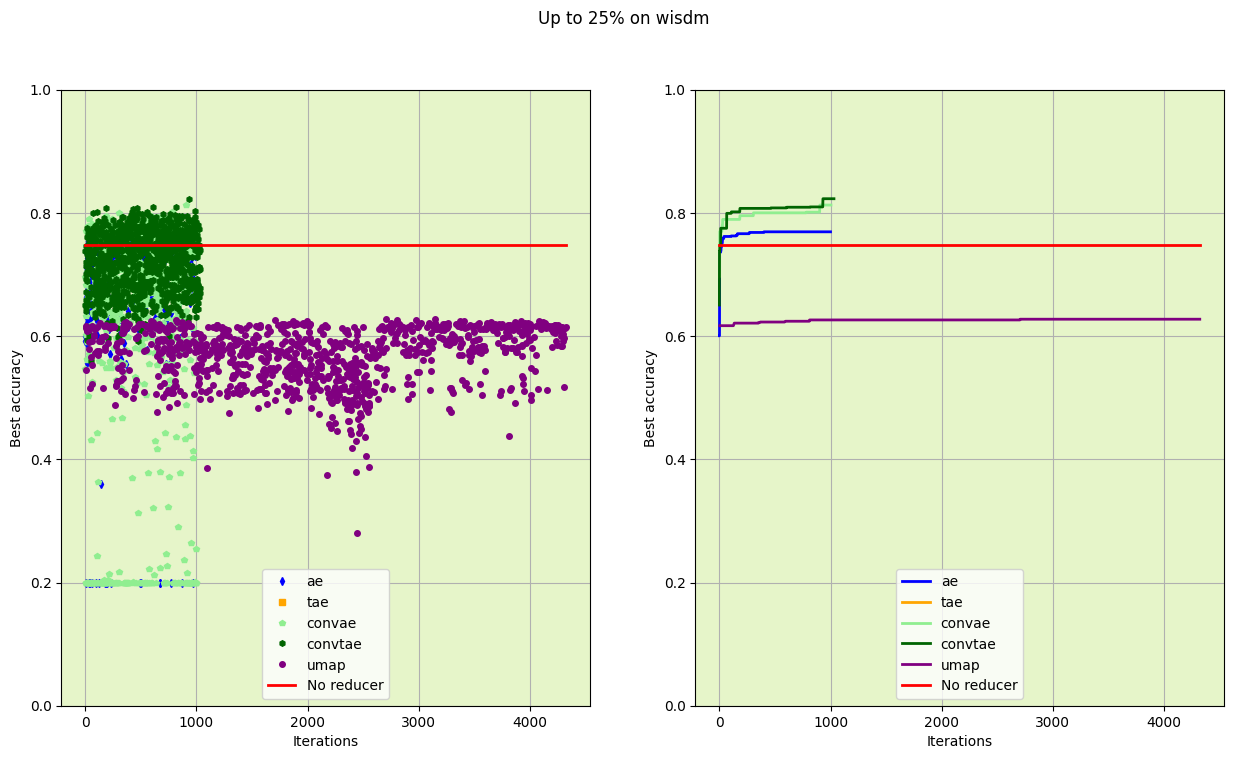

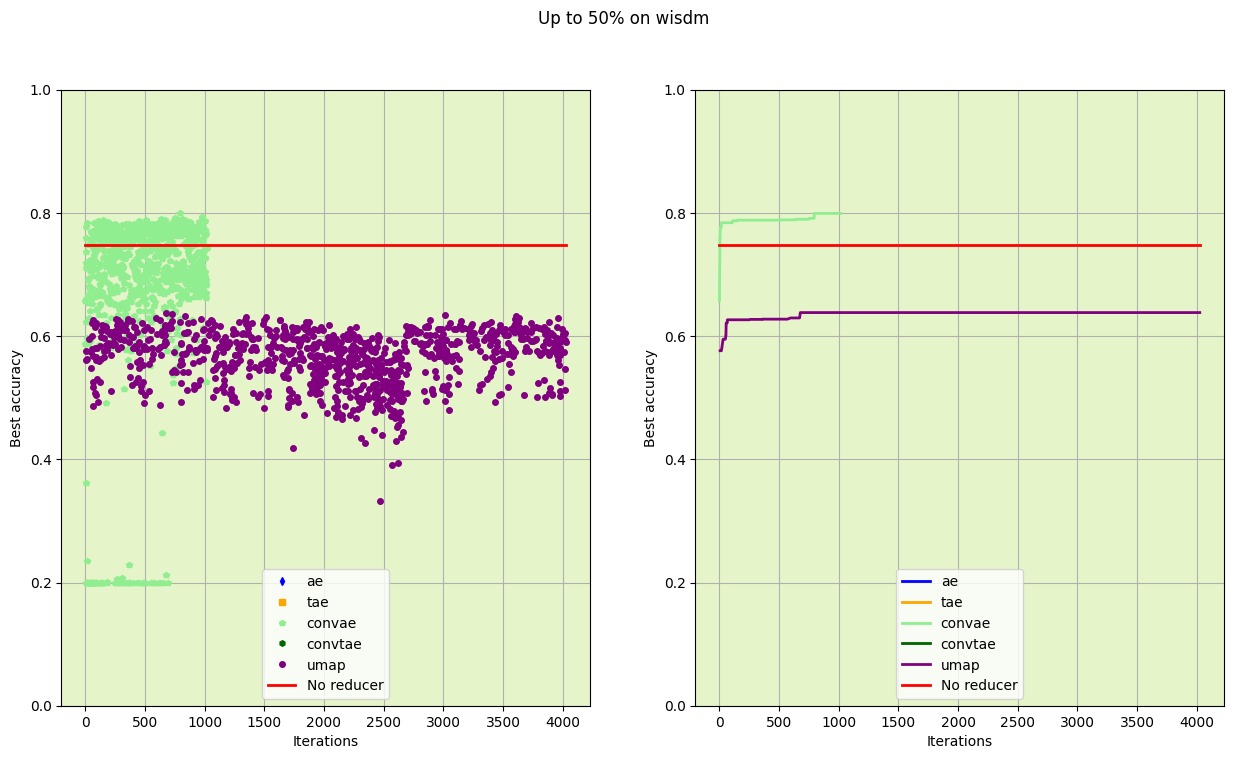

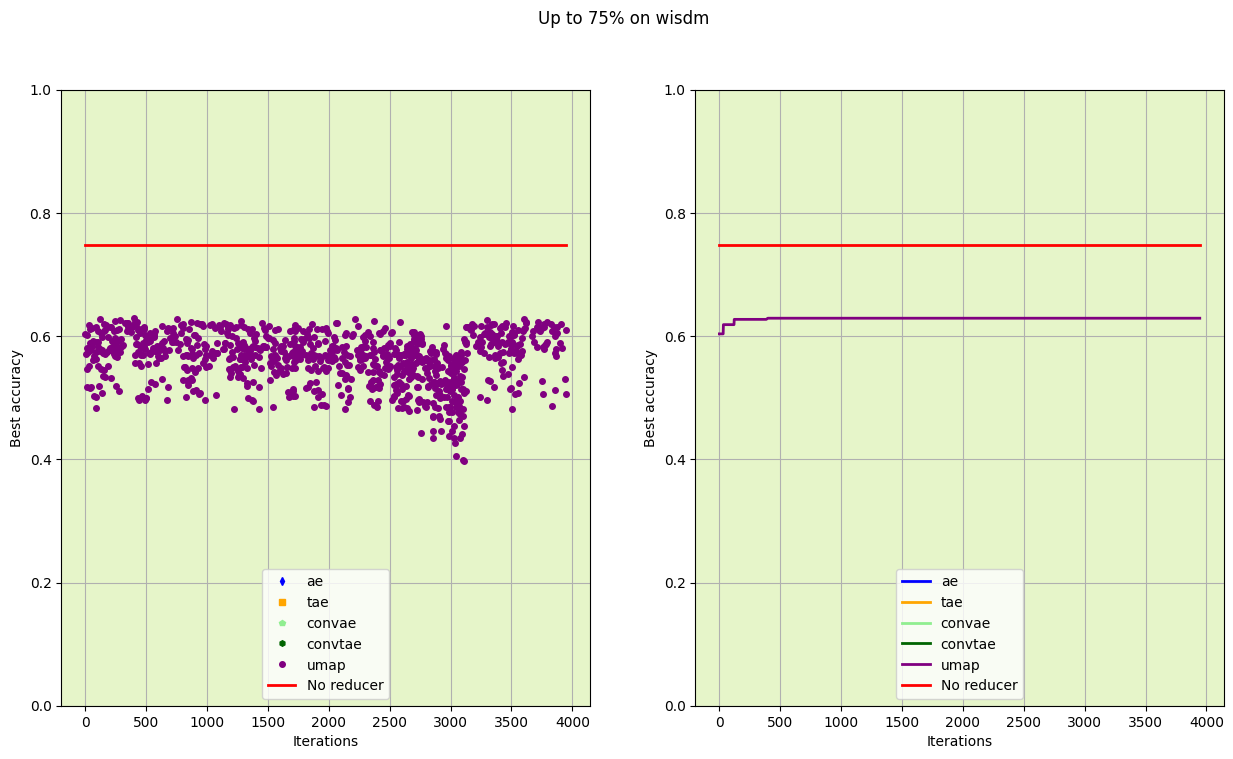

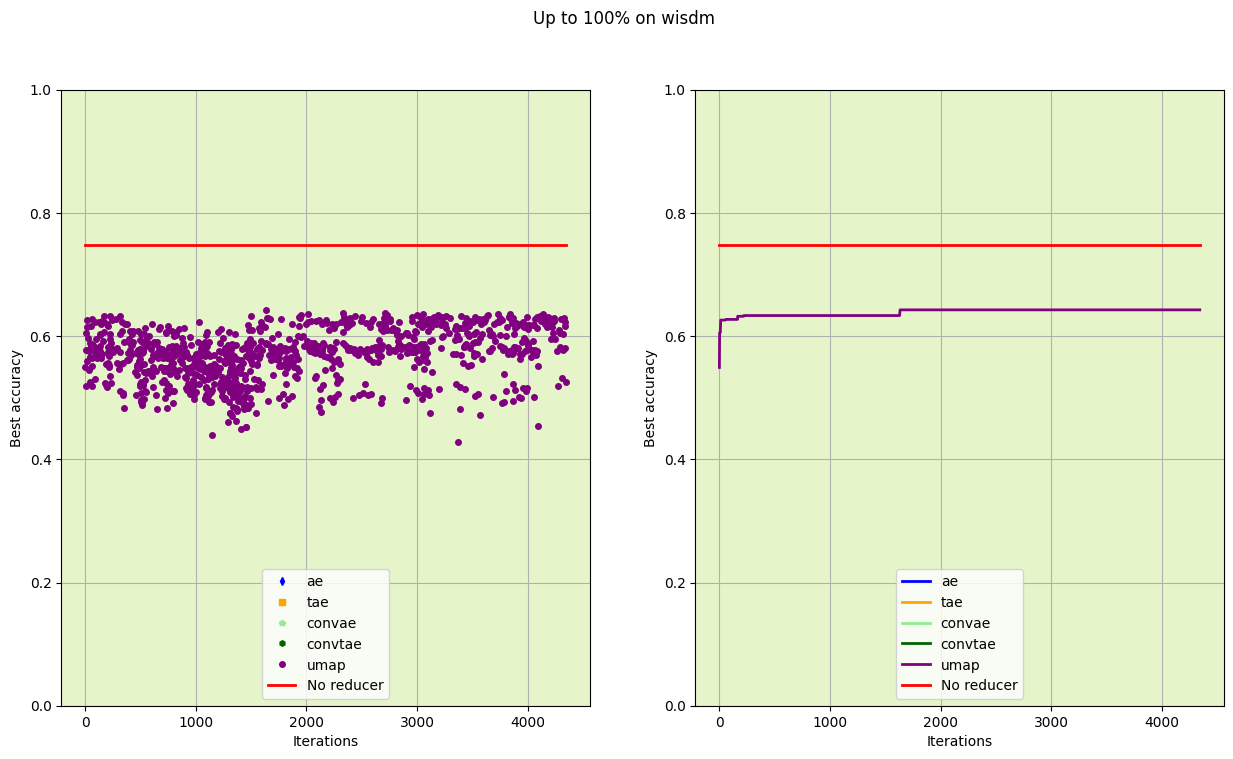

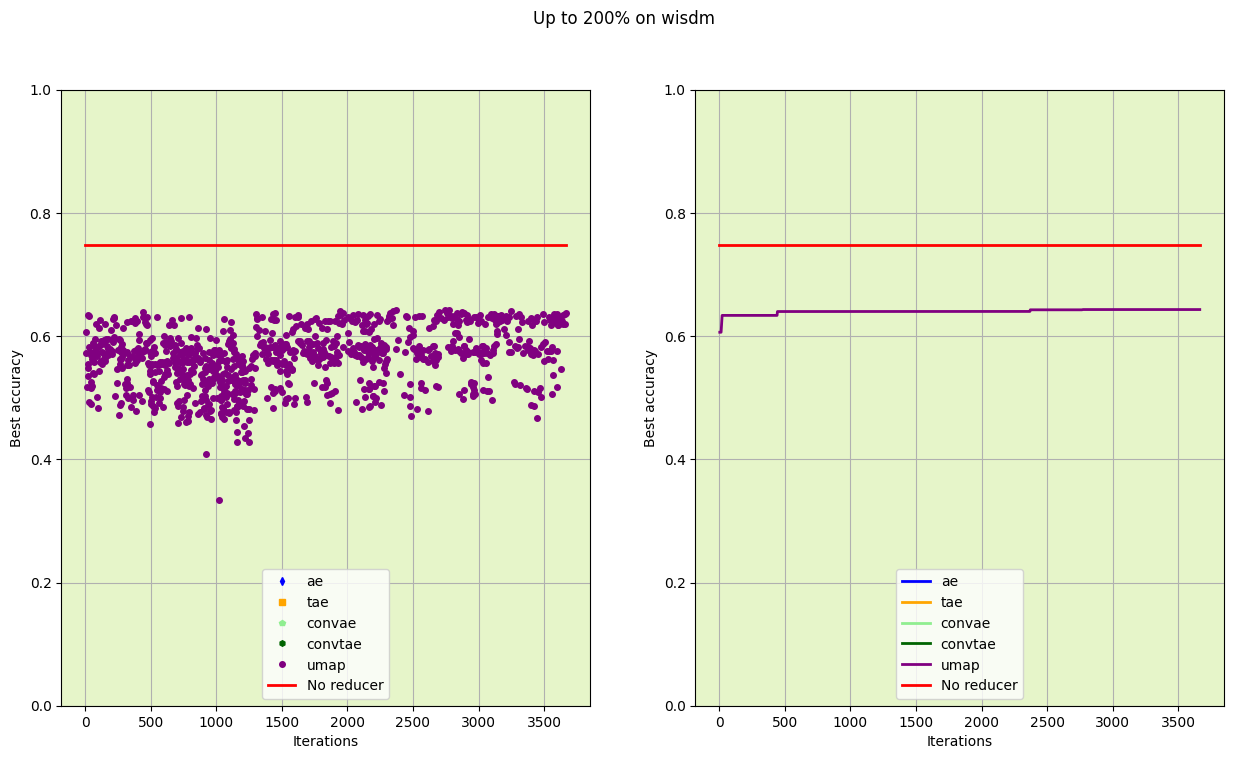

In [104]:
fixed_percentage(datasets=['wisdm'])

## DATASET REALWORLD-THIGH

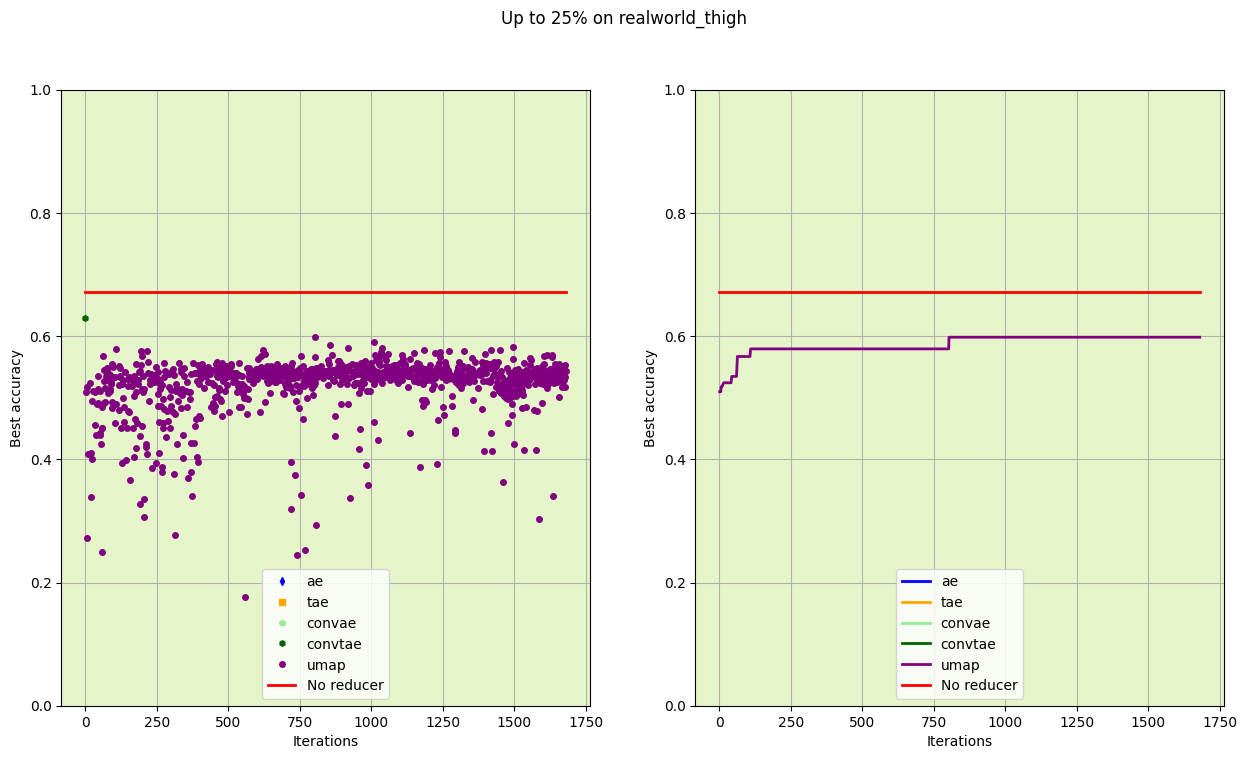

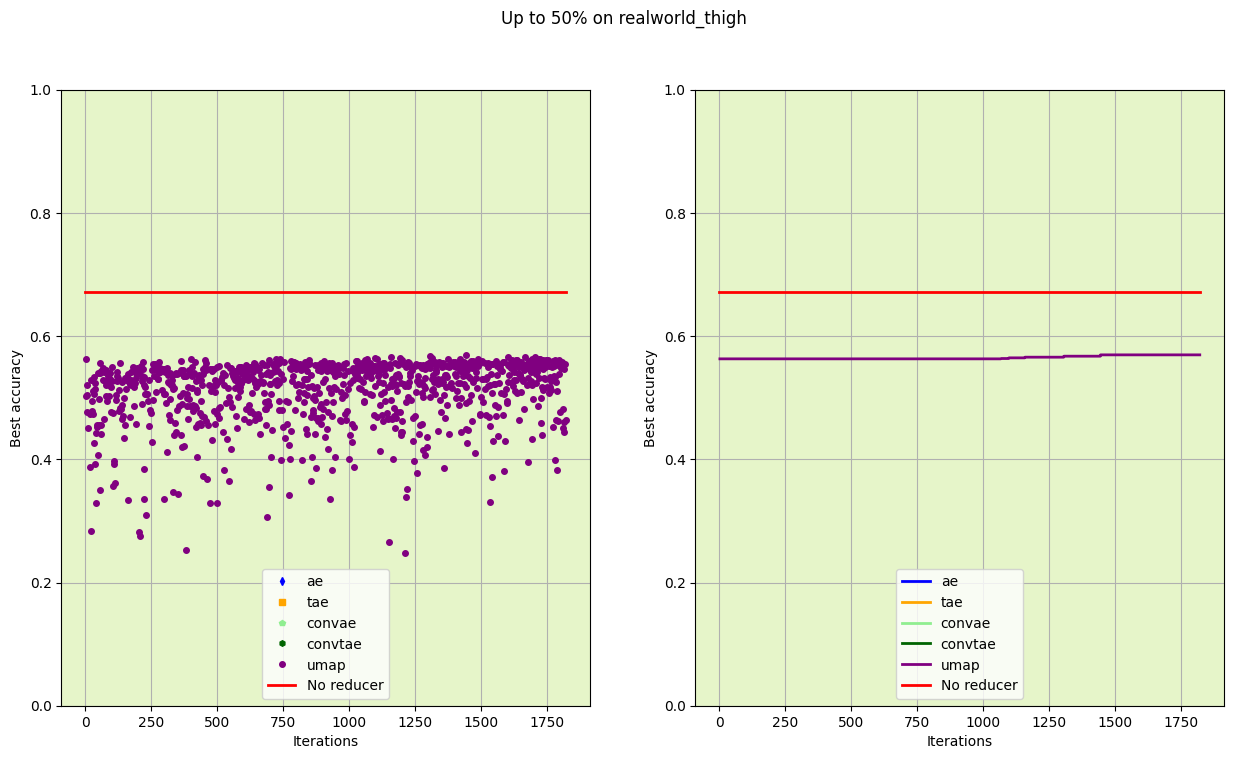

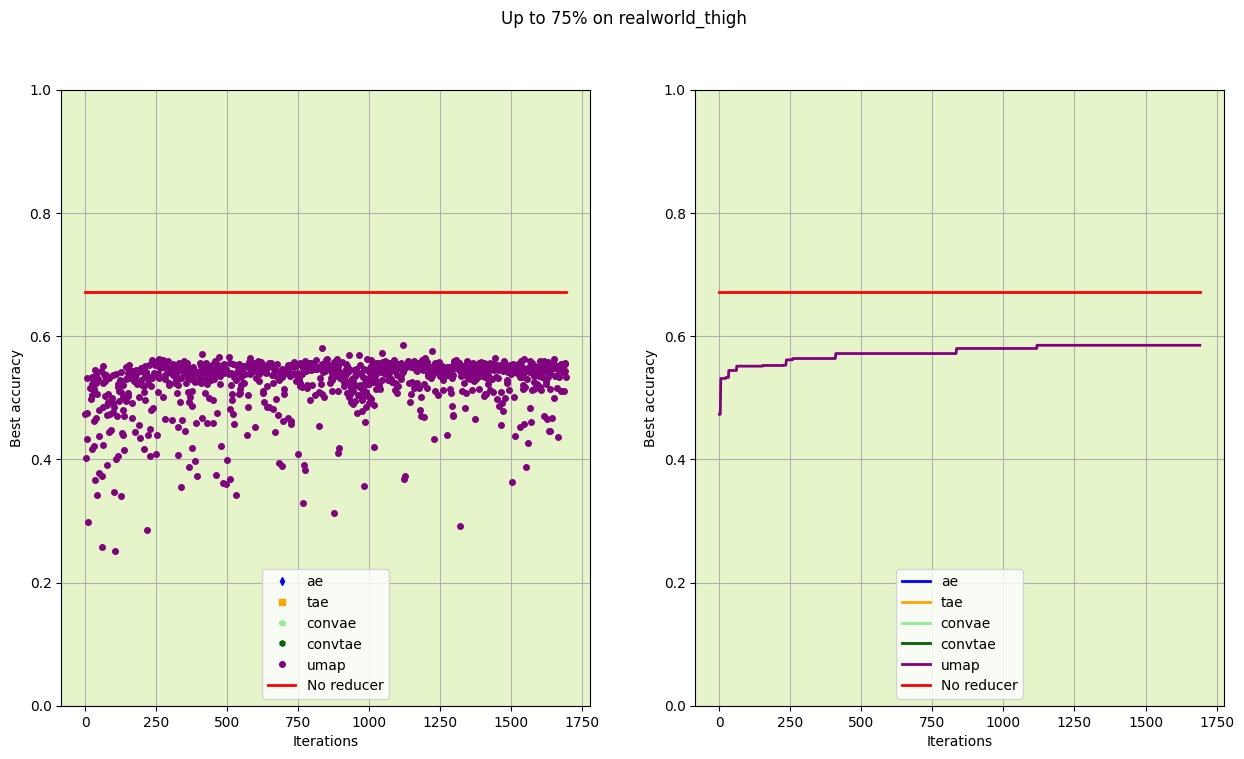

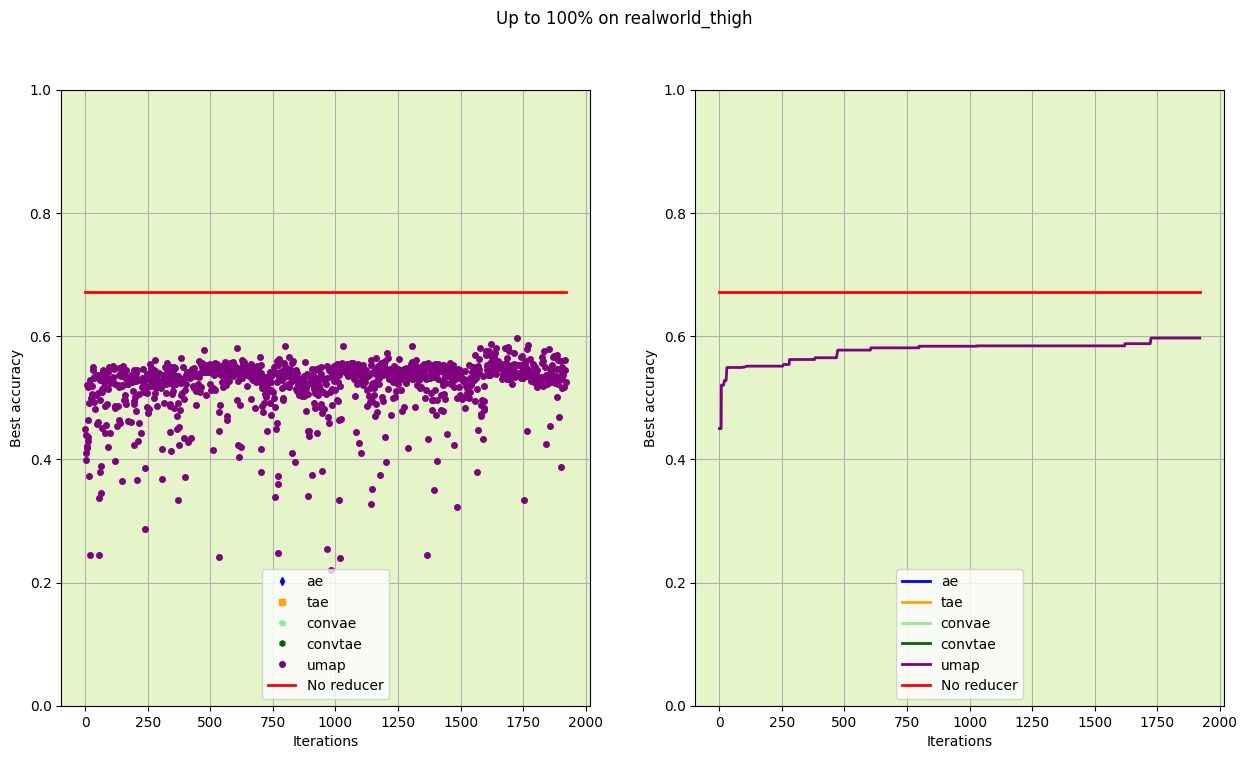

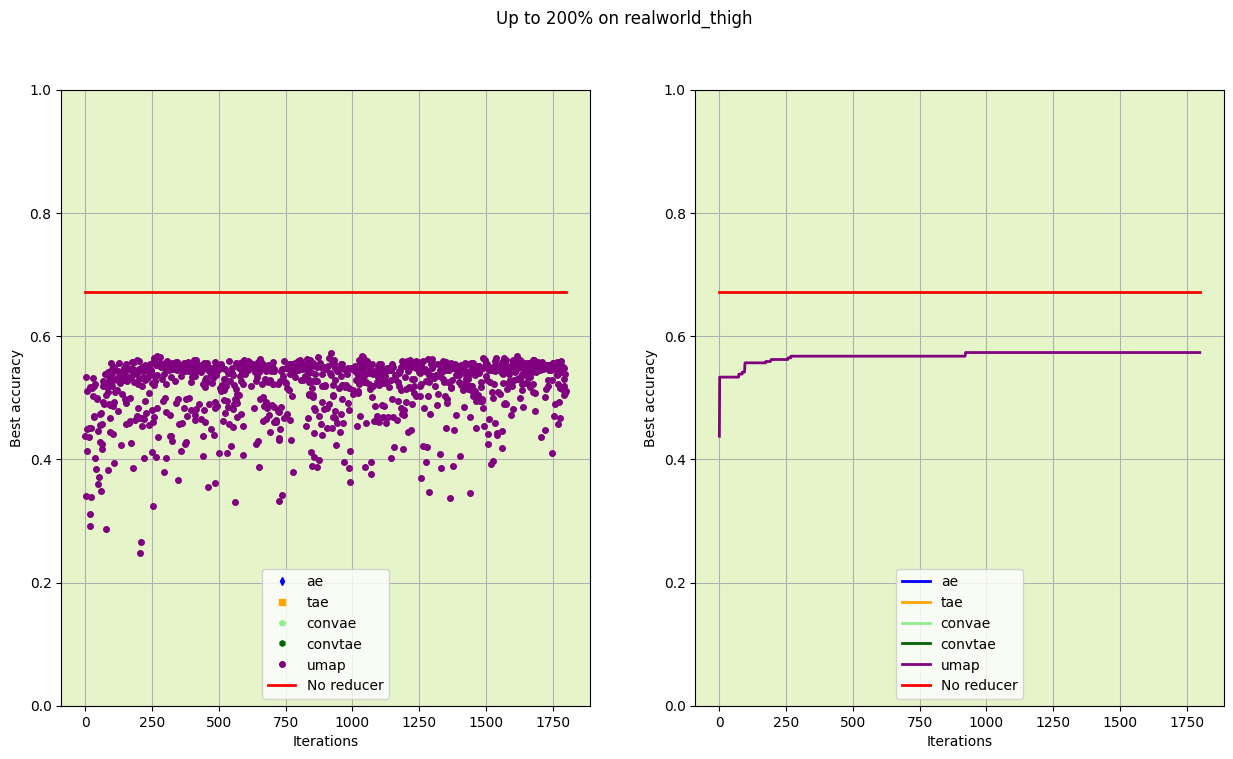

In [105]:
fixed_percentage(datasets=['realworld_thigh'])

## DATASET REALWORLD-WAIST

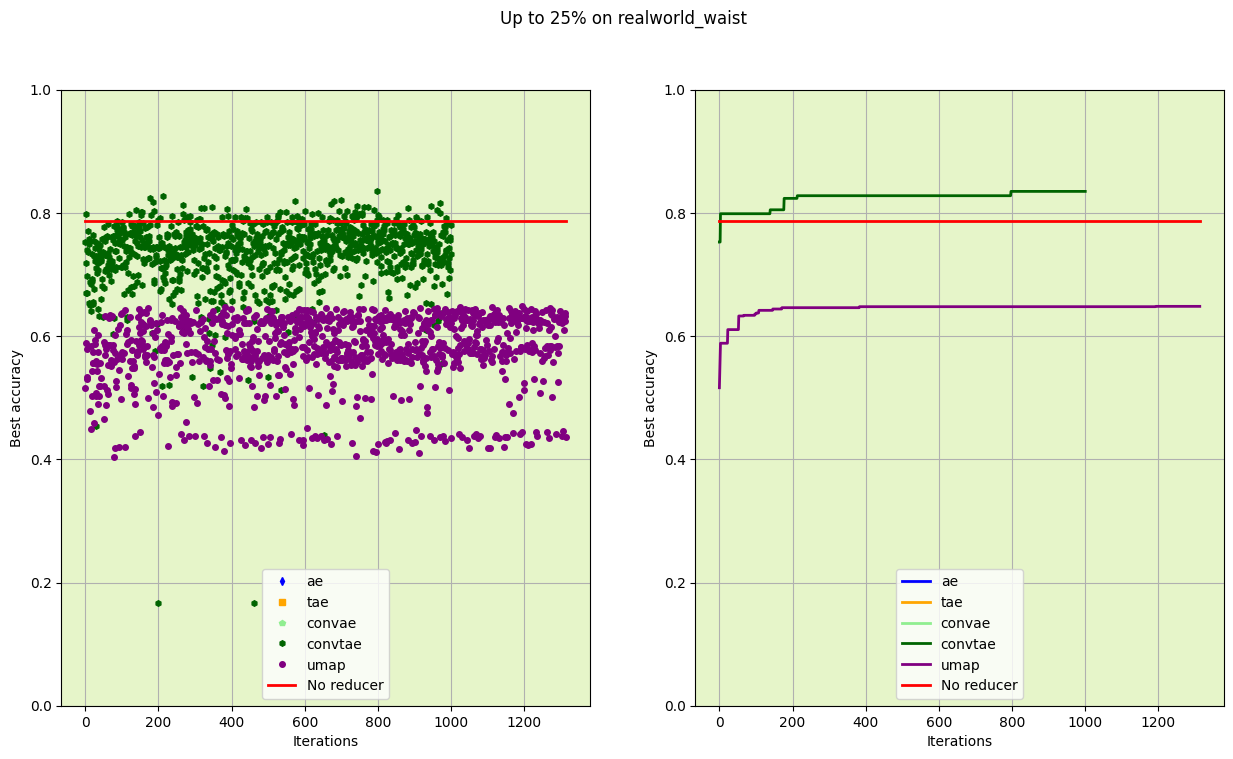

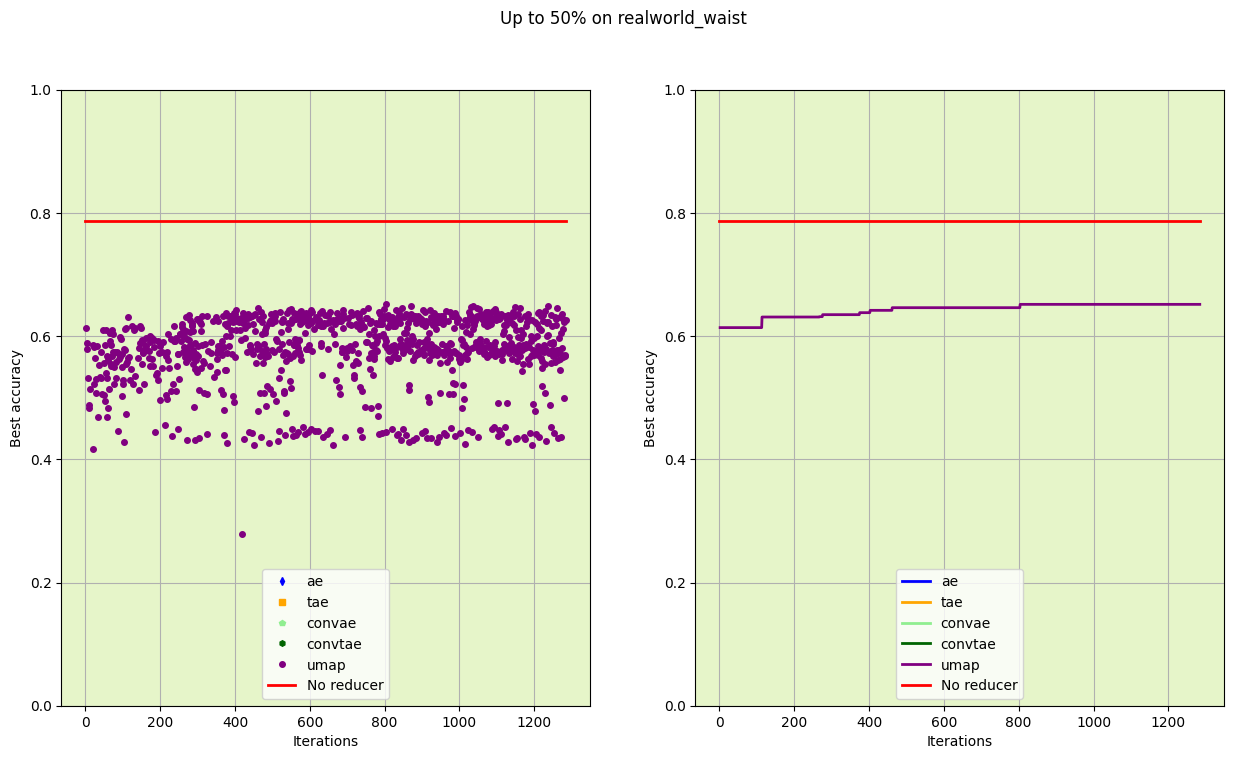

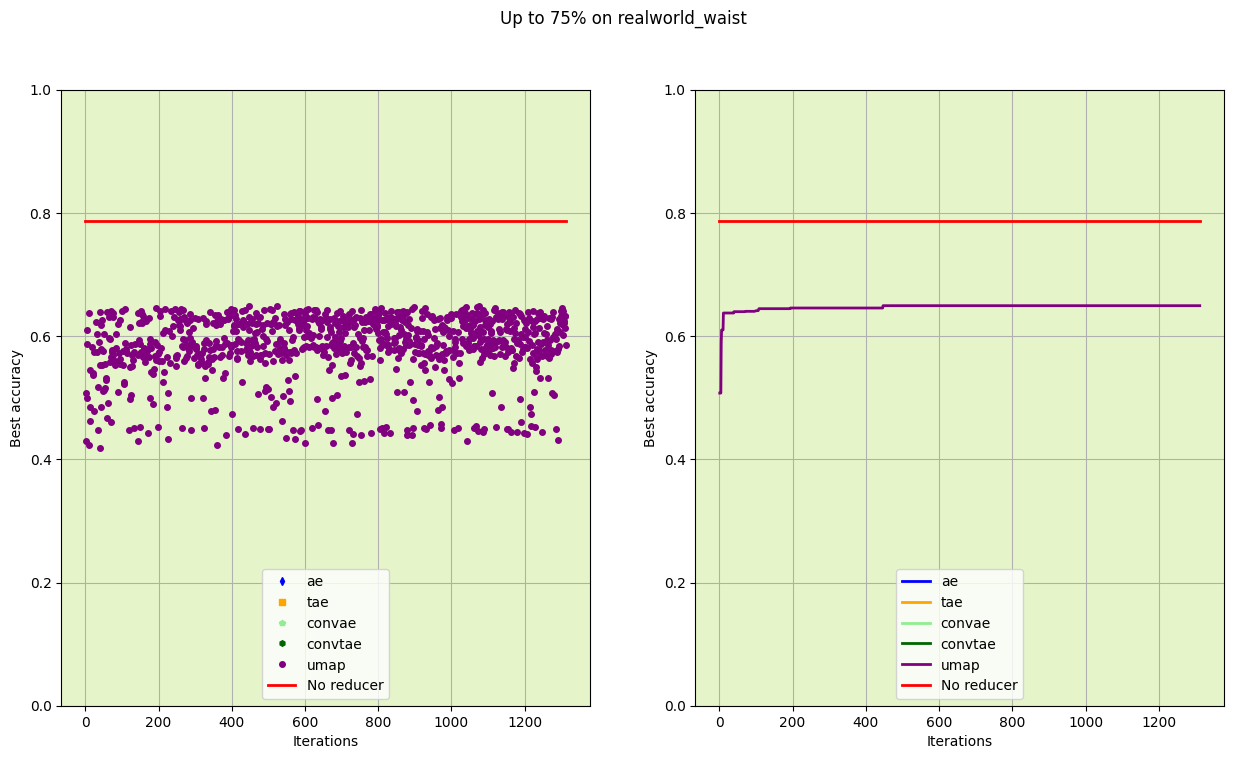

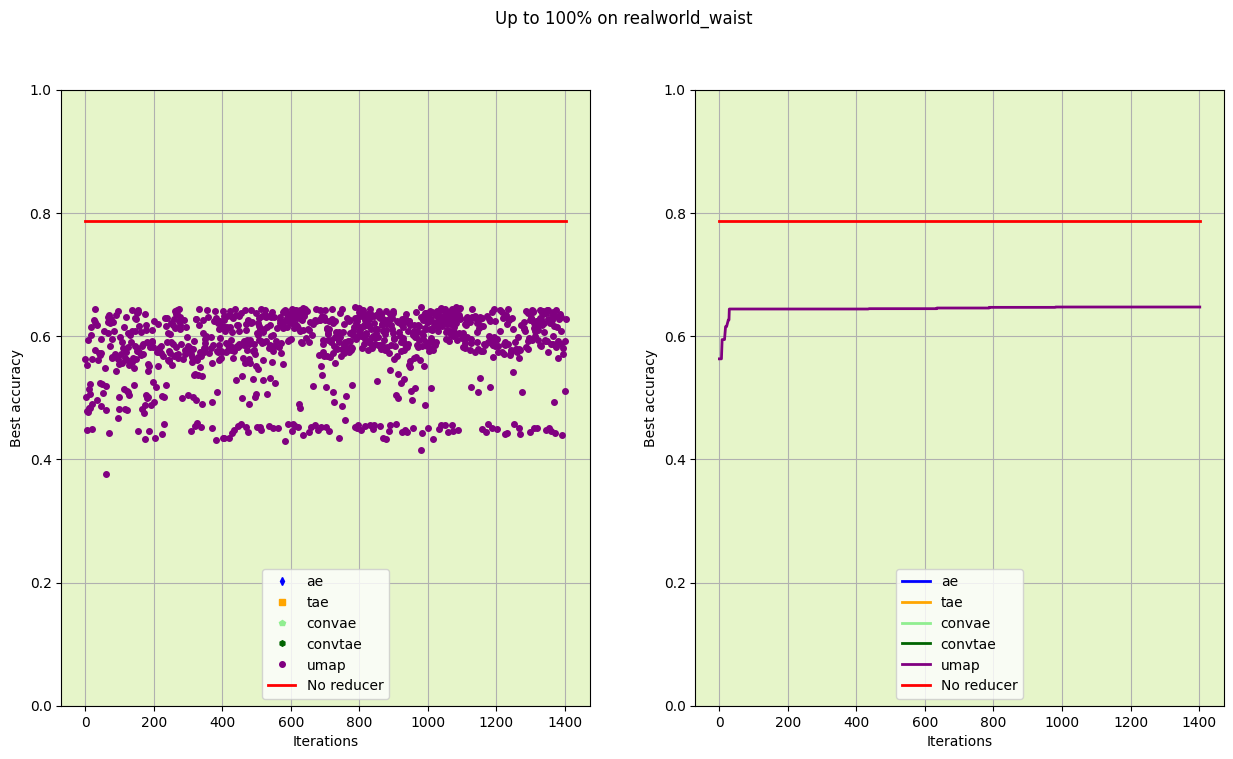

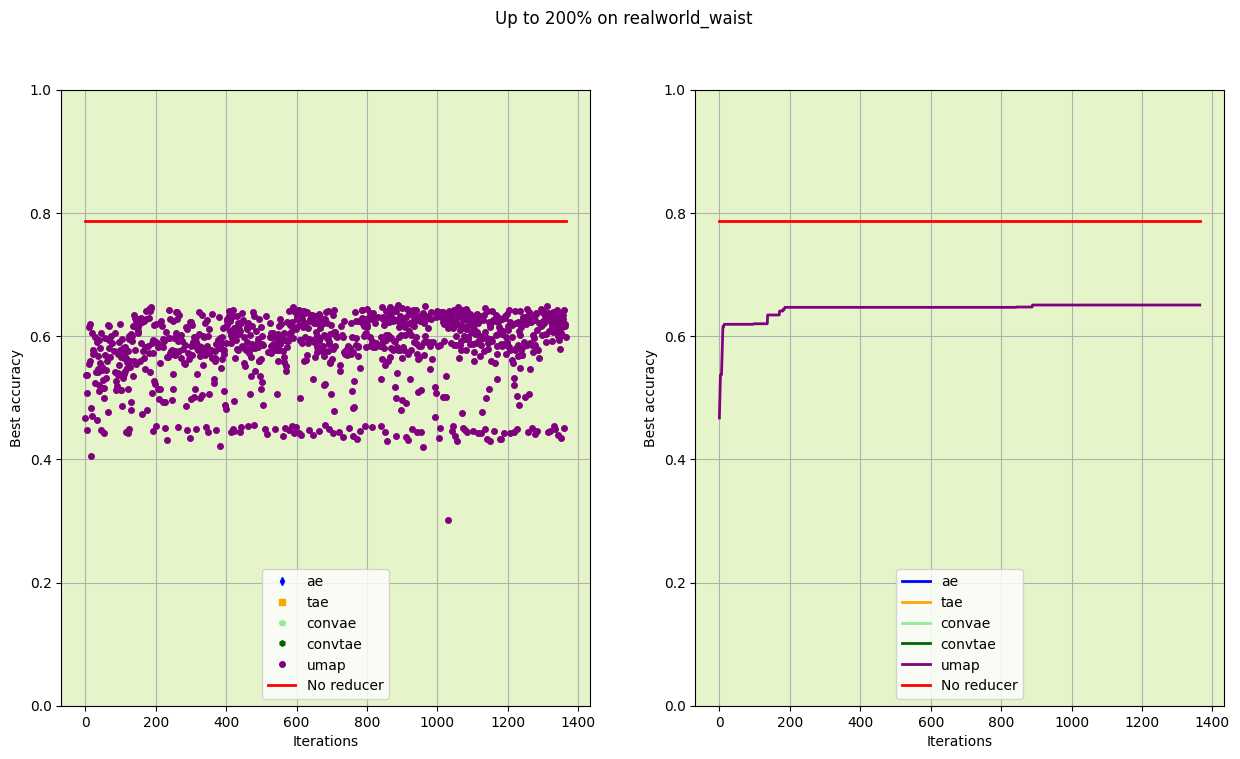

In [106]:
fixed_percentage(datasets=['realworld_waist'])